# Description

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

path = "drive/My Drive/Churn/dataset/"


In [76]:
dataset = pd.read_csv(path+'bank.csv',sep=';')

# EDA DATA

In [77]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Missing Data

In [79]:
dataset.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## Check duplicated data

In [80]:
dataset.duplicated().any()

False

## Summary Statistics

In [81]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Univariate Analysis

In [82]:
binary_list = dataset.select_dtypes(include=['object']).columns
numerical_list = dataset.select_dtypes(include=['int64', 'float64'])


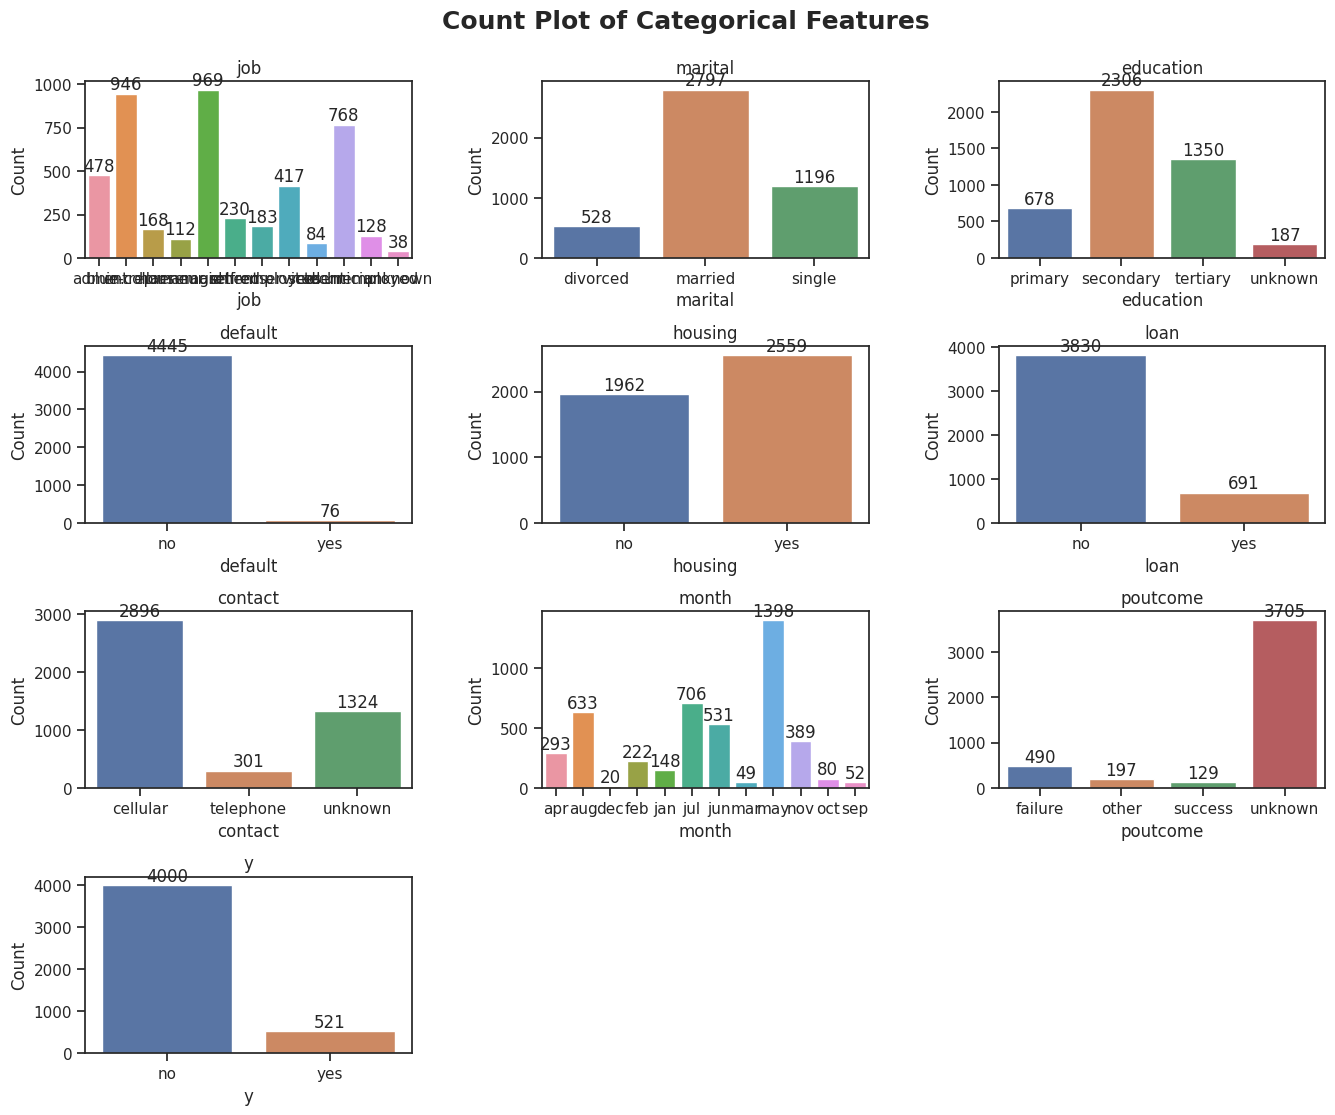

In [83]:
fig = plt.figure(figsize=[16, 12])
fig.suptitle('Count Plot of Categorical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Adjust the grid size to accommodate more subplots
num_rows = 4  # You may need to adjust this based on the number of features
num_cols = 3

for i, column in enumerate(binary_list[:num_rows * num_cols]):
    input = np.unique(dataset[column], return_counts=True)
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.barplot(x=list(input[0]), y=list(input[1]), ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.bar_label(ax.containers[0])

plt.show()


1. The unkown can be change to nan value, and then use impute technique
2. The poutcome feature has a many unknow, so we can remove this feature.
3. the target (y) not balance, we may use smote.
4. the deafault we don't understand what it is, and data is far from balance. mean we may not need deafault

## Numerical Analysis

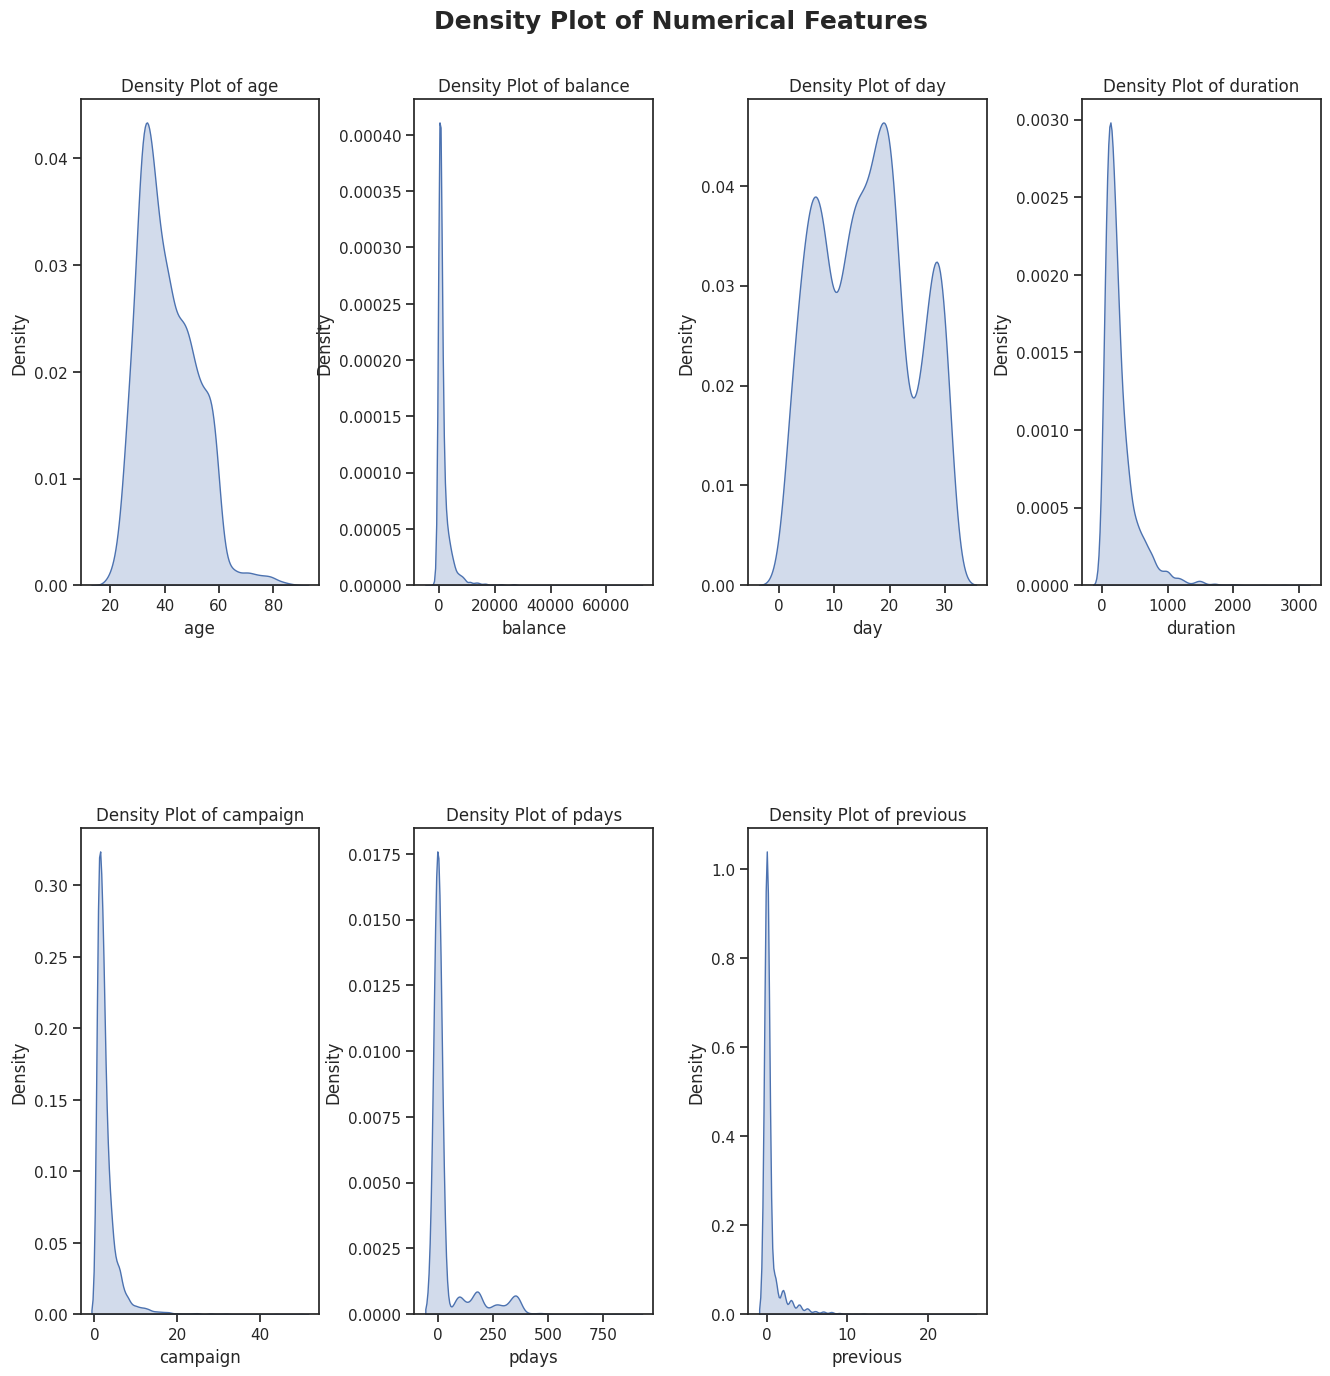

In [84]:
# Set the figure size and title
fig = plt.figure(figsize=(16, 15))
fig.suptitle('Density Plot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through numerical columns and create density plots
for i, column in enumerate(numerical_list.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=numerical_list, x=column, fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.show()

## Bivariate Analysis


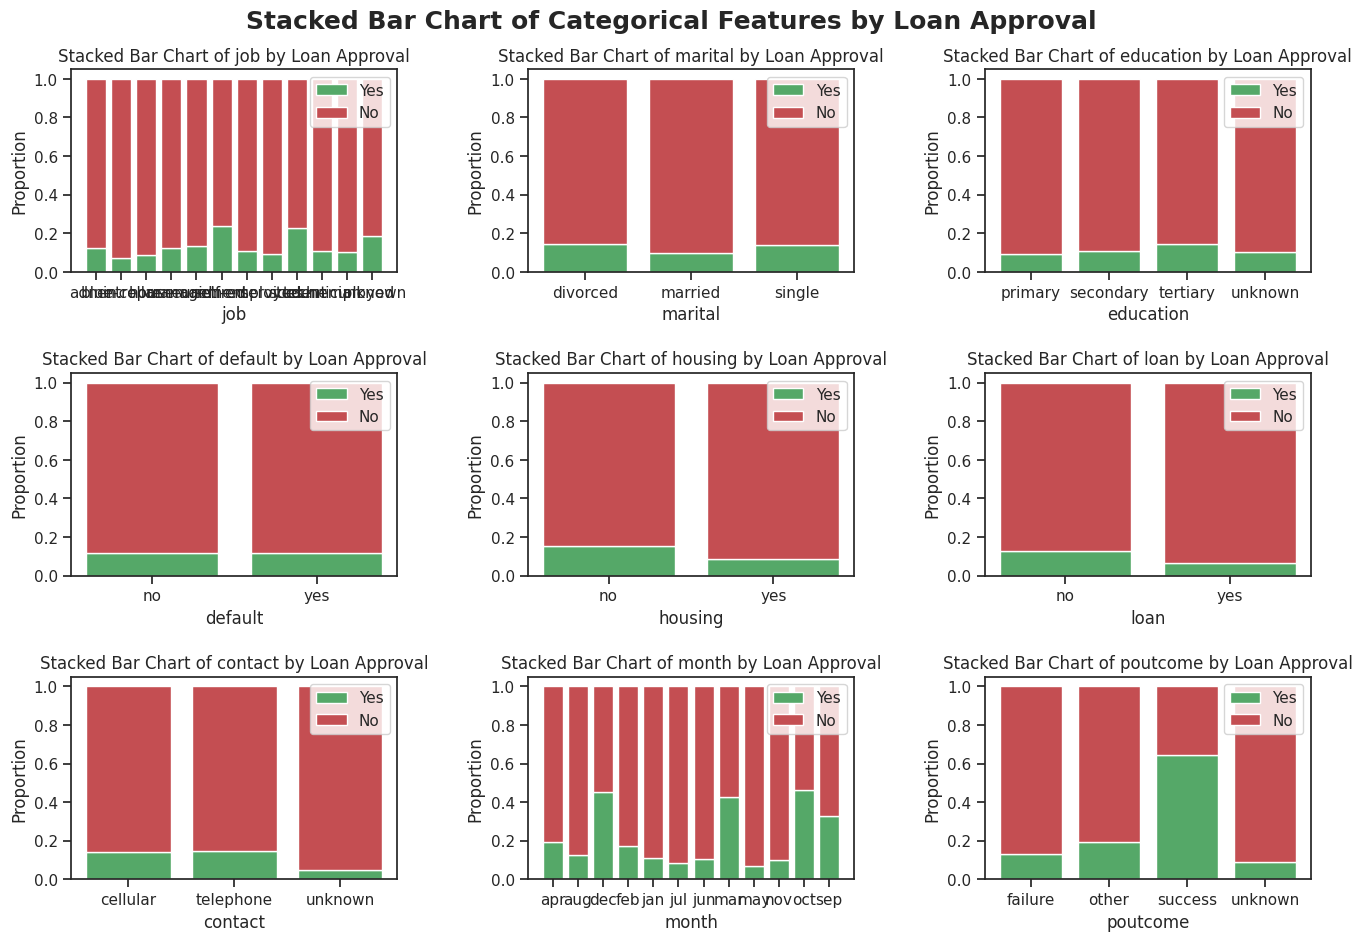

In [85]:
# Set the figure size and title
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
fig.suptitle('Stacked Bar Chart of Categorical Features by Loan Approval', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Loop through categorical columns and create stacked bar charts based on 'y'
for i, column in enumerate(binary_list):
    # Check if there are more subplots available
    if i < len(axes.flat):
        ax = axes.flat[i]

        # Create a cross-tabulation of the categorical column and 'y'
        crosstab = pd.crosstab(dataset[column], dataset['y'])

        # Calculate proportions
        proportions = crosstab.div(crosstab.sum(1), axis=0)

        # Create a stacked bar chart
        ax.bar(proportions.index, proportions['yes'], label='Yes', color='g')
        ax.bar(proportions.index, proportions['no'], label='No', bottom=proportions['yes'], color='r')

        ax.set_title(f'Stacked Bar Chart of {column} by Loan Approval')
        ax.set_xlabel(column)
        ax.set_ylabel('Proportion')
        ax.legend()

plt.show()


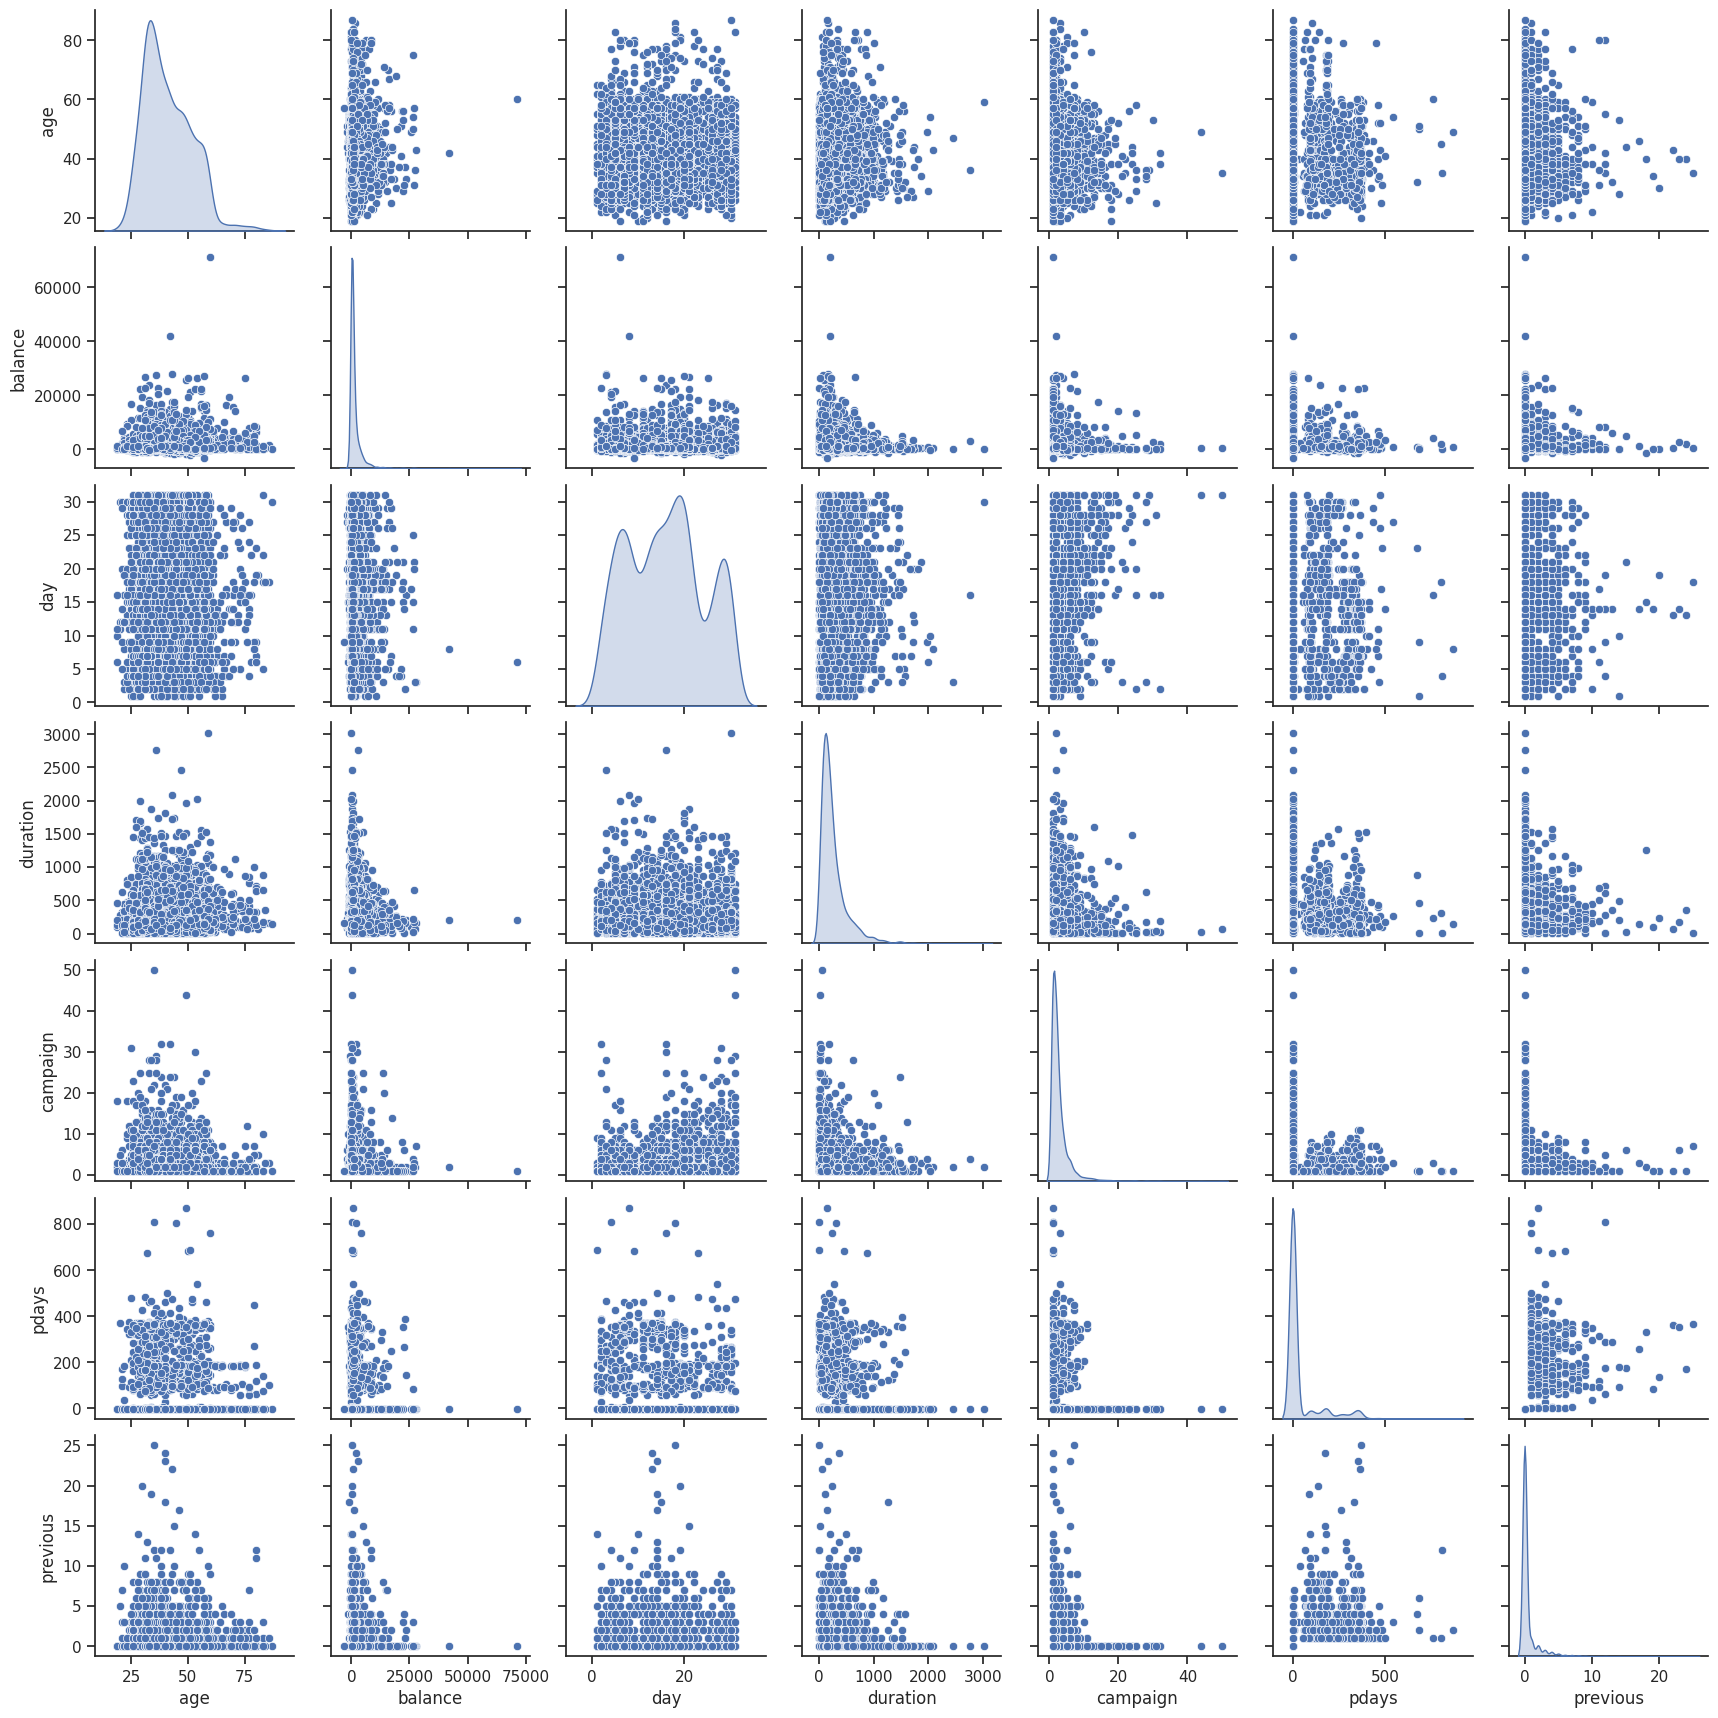

In [86]:
sns.set(style="ticks")
sns.pairplot(dataset, diag_kind="kde", markers="o")

# Show the plots
plt.show()

# Machine Learning Model

In this experiment we will use Logistic regression, SVM, and RandomForest

## Preprocessing

### Changing Missing Value

In [87]:
dataset = dataset.replace('unknown', np.nan)


### Fill NaN Values

In [88]:
from sklearn.impute import SimpleImputer
datamissingcol = dataset.columns[dataset.isna().any()].tolist()
categorical_imputer = SimpleImputer(strategy='most_frequent')
dataset[datamissingcol] = categorical_imputer.fit_transform(dataset[datamissingcol])

### OneHot

In [89]:
X = dataset.drop(['y'],axis=1)
y = dataset['y']


In [90]:
cat_features  = X.select_dtypes(include=['category','object']).columns
num_features  = [col for col in X.columns if col not in cat_features]


In [91]:
column_transformer = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)

In [92]:
X_transformed = column_transformer.fit_transform(X)
transformed_feature_names = column_transformer.get_feature_names_out()
X_transformed_dataset = pd.DataFrame(X_transformed, columns=transformed_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
X_transformed_dataset.head()

,minmaxscaler__age,minmaxscaler__balance,minmaxscaler__day,minmaxscaler__duration,minmaxscaler__campaign,minmaxscaler__pdays,minmaxscaler__previous,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,...,onehotencoder__month_jul,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__poutcome_failure,onehotencoder__poutcome_other,onehotencoder__poutcome_success
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train-Test split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_dataset, y, test_size=0.1, random_state=42)

## Cross validation with Random Forest

In [95]:
rf_param_grid = {
     'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # Explicitly set max_features to 'sqrt'
}

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_grid_search =  RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
rf_best_estimator = rf_grid_search.best_estimator_
rf_best_params,rf_best_estimator

({'n_estimators': 50,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50))

## Cross validation with SVM

In [97]:
from sklearn.svm import SVC
# svm_param_grid = {
#     'C': [0.001, 0.01, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }
svm_param_grid = {
    'C': [0.01, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

sv =  SVC()
sv_grid_search =  RandomizedSearchCV(sv, svm_param_grid, cv=5, scoring='accuracy')
sv_grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 1, 10],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [98]:
sv_best_params = sv_grid_search.best_params_
sv_best_estimator = sv_grid_search.best_estimator_
sv_best_params,sv_best_estimator

({'kernel': 'linear', 'gamma': 1, 'C': 10},
 SVC(C=10, gamma=1, kernel='linear'))

## Cross validation with Logistic regression

In [99]:
from sklearn.linear_model import LogisticRegression
logistic_param_grid = {
    'C': [0.01, 1, 10],
    'penalty': ['l1', 'l2']
}
lr = LogisticRegression()
lr_grid_search =  RandomizedSearchCV(sv, svm_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
lr_best_params = lr_grid_search.best_params_
lr_best_estimator = lr_grid_search.best_estimator_
lr_best_params,lr_best_estimator

({'kernel': 'rbf', 'gamma': 'auto', 'C': 10}, SVC(C=10, gamma='auto'))

## Display evaluation metrics

In [100]:
## create function for use it later
def evaluate_metrics(all_model,X_test,y_test):
  lst = []
  for name,model in all_model:
    pred = model.predict(X_test)
    lst.append([name,
                      precision_score(y_test, pred, average='macro'),
                      recall_score(y_test, pred, average='macro'),
                      f1_score(y_test, pred, average='macro'),
                      accuracy_score(y_test, pred)])
  eval_df = pd.DataFrame(lst, columns=['model', 'precision', 'recall', 'f1_macro', 'accuracy'])
  # eval_df.set_index('model', inplace = True)
  return eval_df

In [101]:
all_model = [("logistic",lr_grid_search),("svm",sv_grid_search),("random forest",rf_grid_search)]
result = evaluate_metrics(all_model,X_test,y_test)
result

,model,precision,recall,f1_macro,accuracy
0,logistic,0.753725,0.558904,0.578761,0.900662
1,svm,0.753725,0.558904,0.578761,0.900662
2,random forest,0.785235,0.540090,0.549094,0.900662


## SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
# lr_grid_search_smote = lr_grid_search.fit(X_smote,y_smote)
# sv_grid_search_smote = sv_grid_search.fit(X_smote,y_smote)
rf_grid_search_smote = rf_grid_search.fit(X_smote,y_smote)

In [103]:
evl = evaluate_metrics([('random forest smote',rf_grid_search_smote)],X_test,y_test)
result = result.append(evl,ignore_index=True)
evl

<ipython-input-103-d2aaddca6bad>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(evl,ignore_index=True)


,model,precision,recall,f1_macro,accuracy
0,random forest smote,0.689134,0.681978,0.68545,0.88521


## remove some Feature

From data anaytis we see that we can remove
1. previous
2. poutcome
3. pdays
4. default

In [104]:
columns_to_remove = [ 'poutcome']
# dataset = dataset.drop([['poutcome','default','previous']],axis=1)
filtered_columns = [col for col in X_train.columns if not any(substring in col for substring in columns_to_remove)]
X_train_remove = X_train[filtered_columns]
X_test_remove = X_test[filtered_columns]

## Train model with remove some feature without SMOTE

In [105]:
lr_grid_search_remove = lr_grid_search.fit(X_train_remove,y_train)
sv_grid_search_remove = sv_grid_search.fit(X_train_remove,y_train)
rf_grid_search_remove = rf_grid_search.fit(X_train_remove,y_train)

In [106]:
all_model = [("logistic remove",lr_grid_search_remove),("svm remove",sv_grid_search_remove),("random forest remove",rf_grid_search_remove)]
evl = evaluate_metrics(all_model,X_test_remove,y_test)
result = result.append(evl,ignore_index=True)
evl

<ipython-input-106-6bbec4847c8d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(evl,ignore_index=True)


,model,precision,recall,f1_macro,accuracy
0,logistic remove,0.447894,0.497537,0.471412,0.891832
1,svm remove,0.447894,0.497537,0.471412,0.891832
2,random forest remove,0.695271,0.592836,0.618419,0.894040


## Train model with remove some feature with SMOTE

In [107]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_smote_remove, y_smote = smote.fit_resample(X_train_remove, y_train)
# lr_grid_search_smote = lr_grid_search.fit(X_smote,y_smote)
# sv_grid_search_smote = sv_grid_search.fit(X_smote,y_smote)
rf_grid_search_smote_remove = rf_grid_search.fit(X_smote_remove,y_smote)

In [108]:
evl = evaluate_metrics([('random forest smote remove',rf_grid_search_smote)],X_test_remove,y_test)
result = result.append(evl,ignore_index=True)
evl

<ipython-input-108-7f96c0af4f3f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(evl,ignore_index=True)


,model,precision,recall,f1_macro,accuracy
0,random forest smote remove,0.647899,0.669663,0.657521,0.863135


# Conclusion

In [109]:
result

,model,precision,recall,f1_macro,accuracy
0,logistic,0.753725,0.558904,0.578761,0.900662
1,svm,0.753725,0.558904,0.578761,0.900662
2,random forest,0.785235,0.540090,0.549094,0.900662
3,random forest smote,0.689134,0.681978,0.685450,0.885210
4,logistic remove,0.447894,0.497537,0.471412,0.891832
5,svm remove,0.447894,0.497537,0.471412,0.891832
6,random forest remove,0.695271,0.592836,0.618419,0.894040
7,random forest smote remove,0.647899,0.669663,0.657521,0.863135


# Save model

In [110]:
import joblib
result_dict = {
    "lr" : lr_grid_search,
    "svc" : sv_grid_search,
    "rf" : rf_grid_search,
    "rfSmote" :rf_grid_search_smote,
    "lrRemove":lr_grid_search_remove,
    "svRemove":sv_grid_search_remove,
    "rfRemove":rf_grid_search_remove,
    "rfSmoteRemove":rf_grid_search_smote_remove
}
joblib.dump(result_dict['rfSmoteRemove'], 'rfSmoteRemove.joblib')


['rfSmoteRemove.joblib']